In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.datasets import make_circles

In [54]:
def initialization(dimansions):
    C=len(dimansions)
    parameters={}
    for c in range(1,C):
        parameters['W'+str(c)]=np.random.randn(dimansions[c],dimansions[c-1])
        parameters['b'+str(c)]=np.random.randn((dimansions[c],1))
    return parameters


In [55]:
def forward_propagation(X,parameters):
    activation={'A0':X}
    C=len(parameters)//2
    for c in range(1, C+1):
        Z=np.dot(parameters['W'+str(c)],activation['A'+str(c-1)])+parameters['b'+str(c)]
        activation['A'+str(c)]=1/(1+np.exp(-Z))

    return  activation

In [56]:
def back_propagation(X,y,parameters,activation):
    grads={}
    C=len(parameters)//2
    m=y.shape[1]
    dZ=activation['A'+str(C)]-y

    for c in range(1,C+1):
        grads['dW'+str(c)]=1/m*np.dot(dZ,activation['A'+str(c-1)].T)
        grads['db'+str(c)]=1/m*np.sum(dZ,axis=1,keepdims=True)
        if c>1:
            dZ=np.dot(parameters['W'+str(c)].T,dZ)*(activation['A'+str(c-1)]*(1-activation['A'+str(c-1)]))

    return grads

In [57]:
def update(grads,params,learning_rate):
    C=len(params)//2
    for c in range(1,C+1):
        params['W'+str(c)]=params['W'+str(c)]-learning_rate*grads['dW'+str(c)]
        params['b'+str(c)]=params['b'+str(c)]-learning_rate*grads['db'+str(c)]
    
    return params

In [58]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [25]:
def log_loss(A,y):
    epsilon=1e-15
    return 1/len(y) * np.sum(-y*np.log(A+epsilon)-(1-y)*np.log(1-A + epsilon))

In [26]:
from sklearn.metrics import accuracy_score

In [52]:
def neural_network(X_train,y_train,n1,learning_rate=0.1,iterations=1000):
    n0=X_train.shape[0]
    n2=y_train.shape[0]
    params=initialization(n0,n1,n2)
    train_loss=[]
    train_acc=[]
    for i in tqdm(range(iterations)):
        activation=forward_propagation(X_train,params)
        grads=back_propagation(X_train,y_train,params,activation)
        params=update(grads,params,learning_rate)
        if i%10==0:
            train_loss.append(log_loss(y_train,activation["A2"]))
            y_pred=predict(X_train,params)
            current_acc=accuracy_score(y_train.flatten(),y_pred.flatten())
            train_acc.append(current_acc)
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label="train loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label="train acc")
    plt.legend()
    plt.show()

    return params

In [ ]:
def deep_neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialization(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]
        if i % 10 == 0:
        # calcul du log_loss et de l'accuracy
            training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
            y_pred = predict(X, parametres)
            training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return training_history

dimension de X: (2, 100)
dimension de y: (1, 100)


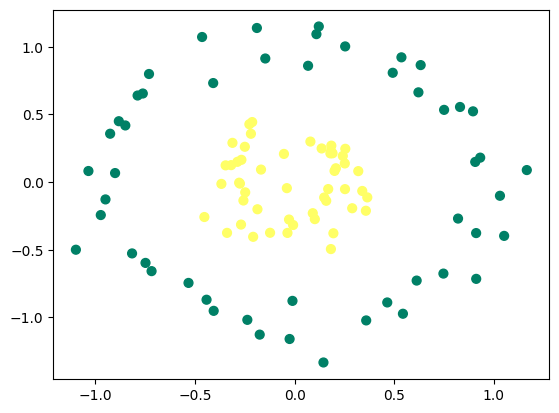

In [28]:
X,y=make_circles(n_samples=100,noise=0.1,factor=0.3,random_state=0)
X=X.T
y=y.reshape(1,y.shape[0])

print('dimension de X:',X.shape)
print('dimension de y:',y.shape)

plt.scatter(X[0 ,:],X[1, :],c=y,s=40,cmap='summer')
plt.show()

100%|██████████| 10000/10000 [00:01<00:00, 8340.56it/s]


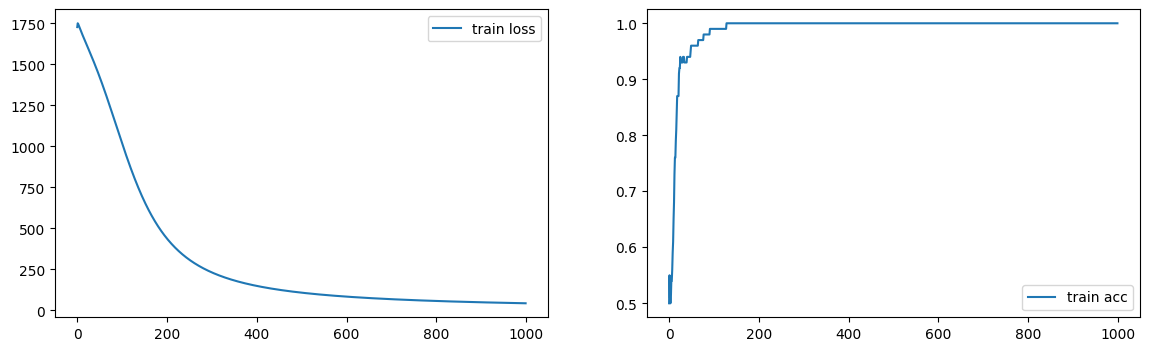

In [34]:
params=neural_network(X,y,n1=32,learning_rate=0.1,iterations=10000)

In [35]:
from utilities import *

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_6828\1508280389.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i)


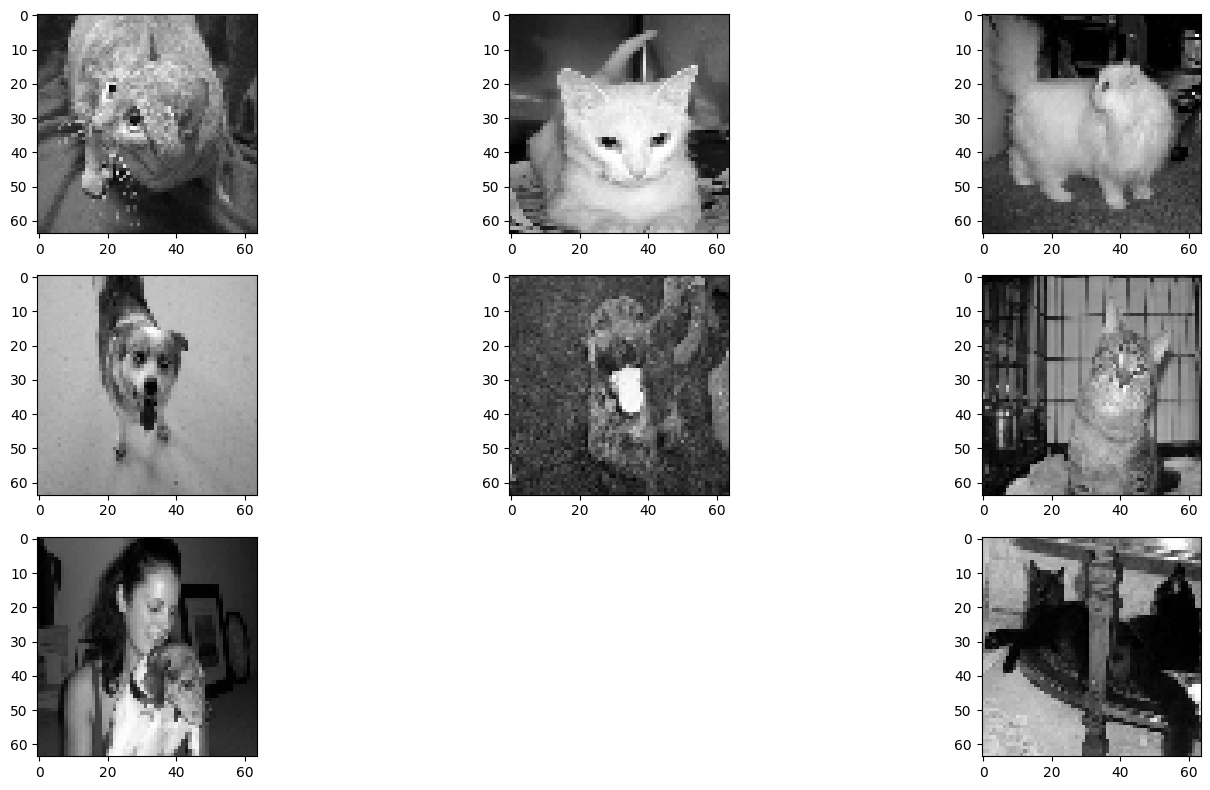

In [46]:
X_train,y_train,X_test,y_test=load_data()
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i],cmap="gray")
    plt.tight_layout()
plt.show()

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [47]:
y_train=y_train.T
y_test=y_test.T

X_train=X_train.T
X_train_reshape=X_train.reshape(-1,X_train.shape[-1]) / X_train.max()

X_test=X_test.T
X_test_reshape=X_test.reshape(-1,X_test.shape[-1]) / X_train.max()

m_train=300
m_test=80

X_test_reshape=X_test_reshape[:,:m_test]
X_train_reshape=X_train_reshape[:,:m_train]
y_test=y_test[:,:m_test]
y_train=y_train[:,:m_train]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|██████████| 8000/8000 [04:10<00:00, 31.93it/s]


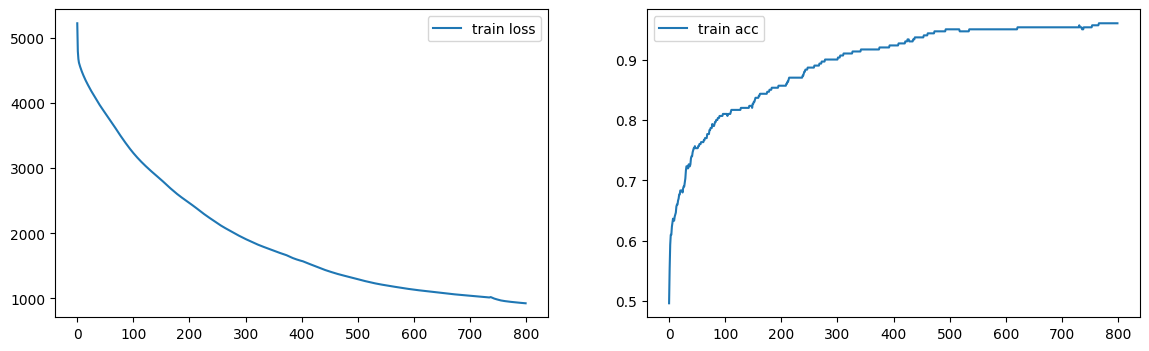

In [53]:
params=neural_network(X_train_reshape,y_train,n1=32,learning_rate=0.1,iterations=8000)